<ipython-input-13-b18b4e1d8917>:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('/content/X_train.txt', delim_whitespace=True, header=None).values
<ipython-input-13-b18b4e1d8917>:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv('/content/X_test.txt', delim_whitespace=True, header=None).values
<ipython-input-13-b18b4e1d8917>:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv('/content/y_train.txt', delim_whitespace=True, header=None).values.ravel()
<ipython-input-13-b18b4e1d8917>:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_test 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 561, 64)        │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 561, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,310 (196.52 KB)

 Trainable params: 50,310 (196.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
115/115 ━━━━━━━━━━━━━━━━━━━━ 90s 743ms/step - accuracy: 0.2458 - loss: 1.6483 - val_accuracy: 0.3444 - val_loss: 1.1456
Epoch 2/15
115/115 ━━━━━━━━━━━━━━━━━━━━ 139s 725ms/step - accuracy: 0.3432 - loss: 1.1962 - val_accuracy: 0.4340 - val_loss: 1.1051
Epoch 3/15
115/115 ━━━━━━━━━━━━━━━━━━━━ 143s 734ms/step - accuracy: 0.4213 - loss: 1.0945 - val_accuracy: 0.5185 - val_loss: 0.9858
Epoch 4/15
115/115 ━━━━━━━━━━━━━━━━━━━━ 141s 723ms/step - accuracy: 0.5020 - loss: 0.9943 - val_accuracy: 0.5232 - val_loss: 0.9631
Epoch 5/15
115/115 ━━━━━━━━━━━━━━━━━━━━ 143s 733ms/step - accuracy: 0.5247 - loss: 0.9673 - val_accuracy: 0.5412 - val_loss: 0.9382
Epoch 6/15
115/115 ━━━━━━━━━━━━━━━━━━━━ 141s 725ms/step - accuracy: 0.5326 - loss: 0.9626 - val_accuracy: 0.5752 - val_loss: 0.9203
Epoch 7/15
115/115 ━━━━━━━━━━━━━━━━━━━━ 84s 732ms/step - accuracy: 0.5291 - loss: 0.9861 - val_accuracy: 0.5745 - val_loss: 0.9047
Epoch 8/15
115/115 ━━━━━━━━━━━━━━━━━━━━ 140s 718ms/step - accuracy: 0.5653 - l

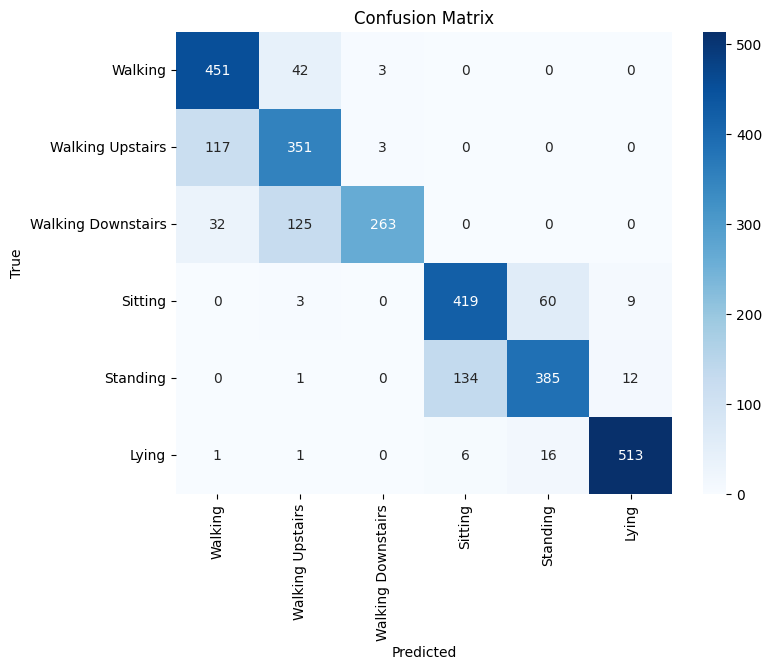

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Load directly from uploaded files in Colab
X_train = pd.read_csv('/content/X_train.txt', delim_whitespace=True, header=None).values
X_test = pd.read_csv('/content/X_test.txt', delim_whitespace=True, header=None).values
y_train = pd.read_csv('/content/y_train.txt', delim_whitespace=True, header=None).values.ravel()
y_test = pd.read_csv('/content/y_test.txt', delim_whitespace=True, header=None).values.ravel()

# Preprocessing
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
y_train_cat = to_categorical(y_train - 1, num_classes=6)
y_test_cat = to_categorical(y_test - 1, num_classes=6)

# Model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.5),
    LSTM(64),
    Dropout(0.5),
    Dense(6, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
model.summary()

# Train
model.fit(X_train, y_train_cat, epochs=15, batch_size=64, validation_data=(X_test, y_test_cat))

# Evaluate
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true = y_test - 1

activity_labels = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Lying']
print(classification_report(y_true, y_pred_labels, target_names=activity_labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=activity_labels, yticklabels=activity_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Load Data
X_train = pd.read_csv('X_train.txt', delim_whitespace=True, header=None).values
X_test = pd.read_csv('X_test.txt', delim_whitespace=True, header=None).values
y_train = pd.read_csv('y_train.txt', delim_whitespace=True, header=None).values.ravel()
y_test = pd.read_csv('y_test.txt', delim_whitespace=True, header=None).values.ravel()

# Preprocessing
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
y_train_cat = to_categorical(y_train - 1, num_classes=6)
y_test_cat = to_categorical(y_test - 1, num_classes=6)

# Labels
activity_labels = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Lying']

# Build Model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.5),
    LSTM(64),
    Dropout(0.5),
    Dense(6, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train_cat, epochs=15, batch_size=64, validation_data=(X_test, y_test_cat))


<ipython-input-6-62eb1f33ba99>:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('X_train.txt', delim_whitespace=True, header=None).values
<ipython-input-6-62eb1f33ba99>:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv('X_test.txt', delim_whitespace=True, header=None).values
<ipython-input-6-62eb1f33ba99>:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv('y_train.txt', delim_whitespace=True, header=None).values.ravel()
<ipython-input-6-62eb1f33ba99>:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_test = pd.read_csv('y_test.txt', del

Epoch 1/15
115/115 ━━━━━━━━━━━━━━━━━━━━ 108s 904ms/step - accuracy: 0.2584 - loss: 1.6270 - val_accuracy: 0.3604 - val_loss: 1.1391
Epoch 2/15
115/115 ━━━━━━━━━━━━━━━━━━━━ 141s 891ms/step - accuracy: 0.3738 - loss: 1.1634 - val_accuracy: 0.4113 - val_loss: 1.1040
Epoch 3/15
115/115 ━━━━━━━━━━━━━━━━━━━━ 140s 877ms/step - accuracy: 0.4236 - loss: 1.0986 - val_accuracy: 0.4754 - val_loss: 0.9979
Epoch 4/15
115/115 ━━━━━━━━━━━━━━━━━━━━ 142s 876ms/step - accuracy: 0.4658 - loss: 1.0523 - val_accuracy: 0.5144 - val_loss: 0.9620
Epoch 5/15
115/115 ━━━━━━━━━━━━━━━━━━━━ 143s 887ms/step - accuracy: 0.5148 - loss: 0.9859 - val_accuracy: 0.5355 - val_loss: 0.9622
Epoch 6/15
115/115 ━━━━━━━━━━━━━━━━━━━━ 131s 793ms/step - accuracy: 0.5421 - loss: 0.9419 - val_accuracy: 0.5280 - val_loss: 0.9221
Epoch 7/15
115/115 ━━━━━━━━━━━━━━━━━━━━ 100s 875ms/step - accuracy: 0.5498 - loss: 0.9321 - val_accuracy: 0.5378 - val_loss: 0.9208
Epoch 8/15
115/115 ━━━━━━━━━━━━━━━━━━━━ 135s 811ms/step - accuracy: 0.5788 -

93/93 ━━━━━━━━━━━━━━━━━━━━ 14s 146ms/step


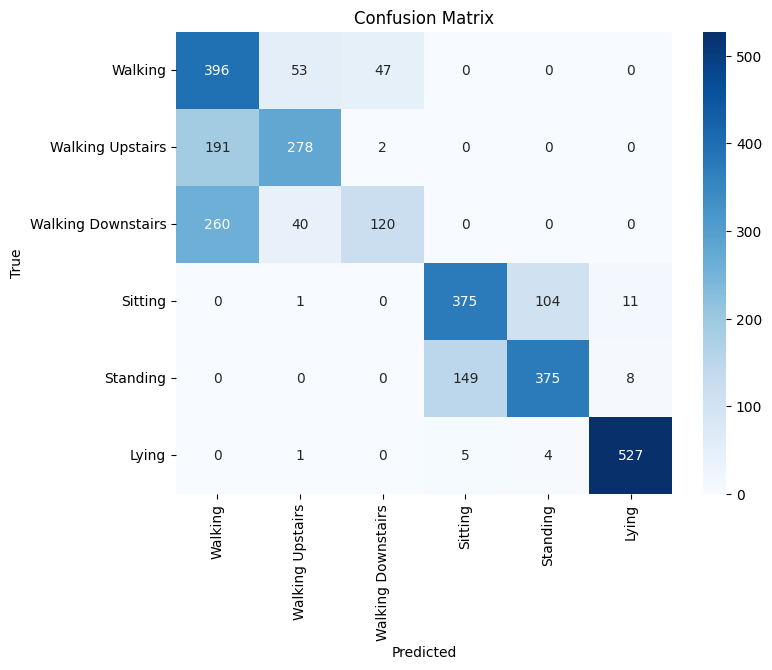

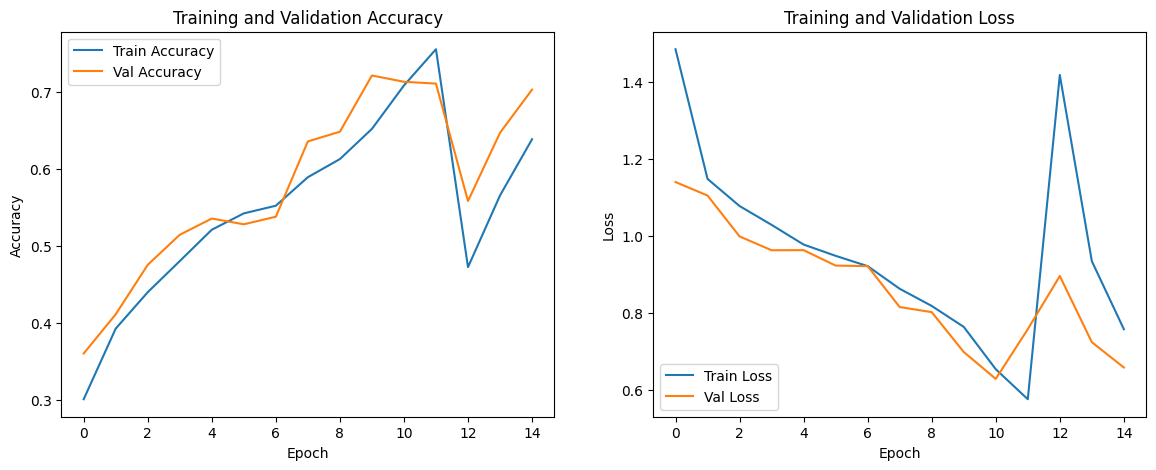

<ipython-input-7-dbbc75b60954>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=f1_scores, y=activity_labels, palette="viridis")


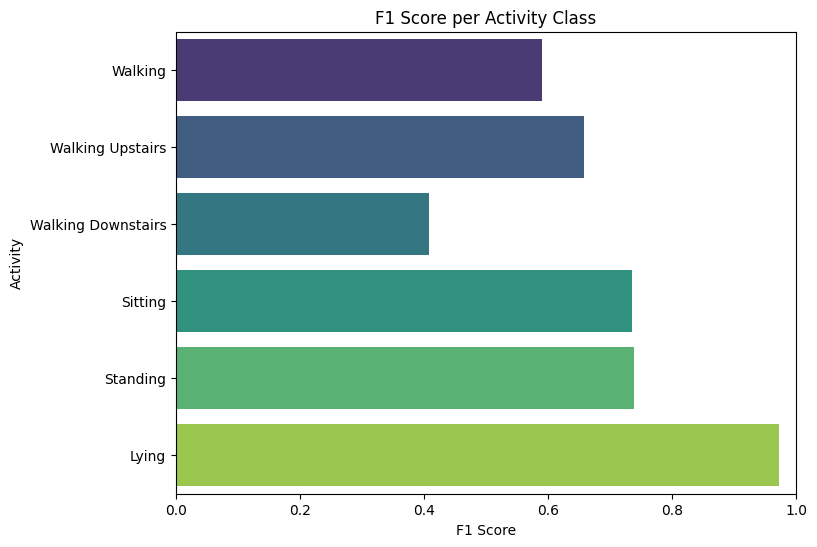

In [7]:
# Predict
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true = y_test - 1

# Classification Report
report = classification_report(y_true, y_pred_labels, target_names=activity_labels, output_dict=True)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=activity_labels, yticklabels=activity_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Accuracy and Loss Curves
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# F1 Score Bar Plot
f1_scores = [report[label]['f1-score'] for label in activity_labels]
plt.figure(figsize=(8,6))
sns.barplot(x=f1_scores, y=activity_labels, palette="viridis")
plt.title('F1 Score per Activity Class')
plt.xlabel('F1 Score')
plt.ylabel('Activity')
plt.xlim(0,1)
plt.show()
